1. Finish calculating the information gain for the remaining features in the classroom example, so Temperature, Humidity and Windy.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

In [51]:
# Function to calculate entropy
def calc_entropy(yes, no):
    total = yes + no
    if total == 0:
        return 0
    p_yes = yes / total
    p_no = no / total
    if p_yes == 0 or p_no == 0:
        return 0  # If all samples belong to one class, entropy is zero
    return -(p_yes * np.log2(p_yes) + p_no * np.log2(p_no))

In [52]:
# Function to calculate information gain
def calc_info_gain(feature_data, total_entropy, total_samples):
    weighted_entropy = 0
    for value, counts in feature_data.items():
        yes, no = counts
        subset_entropy = calc_entropy(yes, no)
        subset_total = yes + no
        weighted_entropy += (subset_total / total_samples) * subset_entropy
    return total_entropy - weighted_entropy

In [53]:
# Data for PlayTennis (Yes = 9, No = 5)
total_yes = 9
total_no = 5
total_samples = total_yes + total_no
total_entropy = calc_entropy(total_yes, total_no)

print(f"Total Entropy (PlayTennis): {total_entropy:.4f}")

Total Entropy (PlayTennis): 0.9403


In [54]:
# Data for Outlook: Sunny = [2 Yes, 3 No], Overcast = [4 Yes, 0 No], Rainy = [3 Yes, 2 No]
outlook_data = {'Sunny': [2, 3], 'Overcast': [4, 0], 'Rainy': [3, 2]}
ig_outlook = calc_info_gain(outlook_data, total_entropy, total_samples)

print(f"Information Gain for Outlook: {ig_outlook:.4f}")

Information Gain for Outlook: 0.2467


In [55]:
# Entropy values for each category in Outlook
entropy_sunny = calc_entropy(2, 3)
entropy_overcast = calc_entropy(4, 0)
entropy_rainy = calc_entropy(3, 2)

print(f"Entropy for Sunny: {entropy_sunny:.4f}")
print(f"Entropy for Overcast: {entropy_overcast:.4f}")
print(f"Entropy for Rainy: {entropy_rainy:.4f}")

Entropy for Sunny: 0.9710
Entropy for Overcast: 0.0000
Entropy for Rainy: 0.9710


In [56]:
# Data for Temperature: Hot = [2 Yes, 2 No], Mild = [4 Yes, 2 No], Cool = [3 Yes, 0 No]
temperature_data = {'Hot': [2, 2], 'Mild': [4, 2], 'Cool': [3, 0]}
ig_temperature = calc_info_gain(temperature_data, total_entropy, total_samples)

print(f"Information Gain for Temperature: {ig_temperature:.4f}")

Information Gain for Temperature: 0.2610


In [57]:
# Data for Humidity: High = [3 Yes, 4 No], Normal = [6 Yes, 0 No]
humidity_data = {'High': [3, 4], 'Normal': [6, 0]}
ig_humidity = calc_info_gain(humidity_data, total_entropy, total_samples)

print(f"Information Gain for Humidity: {ig_humidity:.4f}")

Information Gain for Humidity: 0.4477


In [58]:
# Data for Windy: True = [3 Yes, 2 No], False = [6 Yes, 3 No]
windy_data = {'True': [3, 2], 'False': [6, 3]}
ig_windy = calc_info_gain(windy_data, total_entropy, total_samples)

print(f"Information Gain for Windy: {ig_windy:.4f}")

Information Gain for Windy: 0.0032


In [59]:
# Data for Windy: True = [3 Yes, 2 No], False = [6 Yes, 3 No]
windy_data = {'True': [3, 2], 'False': [6, 3]}
ig_windy = calc_info_gain(windy_data, total_entropy, total_samples)

print(f"Information Gain for Windy: {ig_windy:.4f}")

Information Gain for Windy: 0.0032


2. For a data set with 15 features what is the upper bound for the entropy? The unit for Information Theoretic entropy (base 2 log) is the bit

In [60]:
# Number of features
n_features = 15

In [61]:
# Calculate the upper bound for entropy
upper_bound_entropy = np.log2(n_features)
print(f"Upper Bound for Entropy with {n_features} features: {upper_bound_entropy:.4f} bits")

Upper Bound for Entropy with 15 features: 3.9069 bits


3. Write Python code to create a bar chart representing the class distribution on the x-axis and entropy values on the y-axis for the following class

        distributions:
            [1.0, 0.0], [0.9, 0.1], [0.8, 0.2], ..., [0.2, 0.8], [0.1, 0.9], [0.0, 1.0]

In [62]:
# Class distributions
distributions = [[1.0, 0.0], [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], 
                 [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.3, 0.7], 
                 [0.2, 0.8], [0.1, 0.9], [0.0, 1.0]]

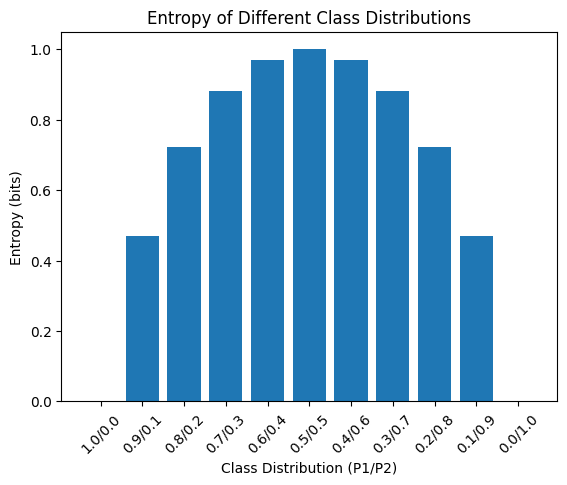

In [63]:
# Calculate entropy for each distribution
entropies = [entropy(d, base=2) for d in distributions]

# Create a bar chart
x_labels = [f"{dist[0]:.1f}/{dist[1]:.1f}" for dist in distributions]
plt.bar(x_labels, entropies)
plt.xlabel('Class Distribution (P1/P2)')
plt.ylabel('Entropy (bits)')
plt.title('Entropy of Different Class Distributions')
plt.xticks(rotation=45)
plt.show()

4. You are working with a dataset that has 3 classes: A, B, and C, with the following distribution:

        Class A: 40 samples,
        Class B: 35 samples,
        Class C: 25 samples.

Calculate the Gini impurity for this dataset.

In [64]:
# Number of samples in each class
class_A = 40
class_B = 35
class_C = 25

# Total number of samples
total_samples = class_A + class_B + class_C

In [65]:
# Calculate proportions for each class
p_A = class_A / total_samples
p_B = class_B / total_samples
p_C = class_C / total_samples

# Calculate Gini impurity
gini_impurity = 1 - (p_A**2 + p_B**2 + p_C**2)

In [66]:
print(f"Gini Impurity: {gini_impurity:.4f}")

Gini Impurity: 0.6550
